In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re
import scipy as sci
import time

In [2]:
# global vars
samp_rt = 5120 #sampling rate Hz
time_import = 3000 # time to analyse seconds
data_import = samp_rt * time_import # lines of data to import

In [3]:
def list_o_list(big_list, lil_size):
    l_o_l = []
    for i in range(0, len(big_list), lil_size):
        lil = big_list[i : min(i + lil_size, len(big_list))]
        l_o_l.append(lil)
    return(l_o_l)

In [4]:
def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
    frqs = ""
    amps = []
    samp_int = 1/sampfrq
    ft = np.fft.fft(sample)/len(sample)
#     mmhic = time.perf_counter()
    ft = ft[range(int(len(sample)/2))]
    tpCount = len(sample)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/sampfrq
    frequencies = values/timePeriod
    ft = abs(ft)
#     mmcup = time.perf_counter()
    #print(len(ft))
    #print(len(frequencies))
    feq = pd.DataFrame(data = {"freq":frequencies})
#     l1 = time.perf_counter()
    feq["amp"] = ft
#     l2 = time.perf_counter()
    frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
#     l3 = time.perf_counter()
    #print(len(frqs))
#     mmbless = time.perf_counter()
    wow = feq.amp.rolling(10).mean()
    yep = np.arange(responsefrq - 1, len(wow) + responsefrq  -1, responsefrq)
    amps = wow[yep]
#     l4 = time.perf_counter()
#     mmtoc = time.perf_counter()
#     print("init:", mmhic-mmtic)
#     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
#     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
#     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
#     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
#     print("for:", l4 - l3)
    return(frqs, amps)

In [5]:
test_list  = list(range(1,33,4))
test_chop = 9
print(list_o_list(test_list, test_chop))


[[1, 5, 9, 13, 17, 21, 25, 29]]


In [6]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 'alt_modular.py',
 'bayesian_optimiser_tute.py',
 'capstone2_milestone 2.ipynb',
 'checkpoint.pth',
 'data',
 'data_prep.ipynb',
 'data_prep_development.ipynb',
 'data_prep_final.ipynb',
 'EDA.ipynb',
 'EDA2.ipynb',
 'eda2_b.ipynb',
 'EDA3.ipynb',
 'Figure 2020-11-08 143412.png',
 'Figure 2020-11-08 143421.png',
 'gps_inclusion.ipynb',
 'init_lstm_epoch_10.dat',
 'init_lstm_optim_state_epoch_10.dat',
 'init_lstm_state_epoch_10.dat',
 'linear_LSTM.py',
 'lstm.ipynb',
 'lstm2.py',
 'lstm2_data_prep.py',
 'lstm2_data_prep_double_sensor.py',
 'LSTM_classes.py',
 'LSTM_classes_functions.py',
 'lstm_examples.py',
 'lstm_model_01.py',
 'LSTM_modular.py',
 'LSTM_modular_combined.py',
 'LSTM_modular_two_sensor.py',
 'lstm_multivariate_working.py',
 'lstm_network.py',
 'LSTM_pipeline.py',
 'LSTM_sentiment_test.py',
 'lstm_training.ipynb',
 'main.py',
 'README.md',
 'requirements.txt',
 'testing_Conv1D.ipynb',
 'torch_loader_tute.py',
 'Un

In [7]:
home = os.getcwd()


In [38]:

os.chdir("./data/08-14-18-V118")
os.getcwd()

'C:\\Users\\Grey Ghost\\Documents\\GitHub\\project-sturm_drang\\data\\08-14-18-V118'

In [39]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [40]:
print(files)

['.hubstorinfo', '08-14-18-V118_ch1.csv', '08-14-18-V118_ch2.csv', 'ft_first_3000.csv']


In [41]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"], nrows = data_import)
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"], nrows = data_import)
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")

In [42]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15360000 entries, 0 to 15359999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 468.8 MB


In [43]:
acc_a = list(raw.acceleration_a)
acc_b = list(raw.acceleration_b)

In [44]:
l1 = list_o_list(acc_a, 5120)


In [45]:
l2 = list_o_list(acc_b, 5120)

In [46]:
len(l1[0])

5120

In [47]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 7.9006414000000404


In [48]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc-mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 7.300061699999787


In [49]:
len(ft_l1)

3000

In [50]:
len(ft_l1[0])

256

In [51]:
len(frq_l1)

256

In [52]:
type(ft_l1)


list

In [53]:
type(ft_l1[0])

pandas.core.series.Series

In [54]:
dic_ = {}
for c,v in enumerate(frq_l1):
#     print(c , v)
    value = []
    for i in ft_l1:
#         print(i)
        value.append(i.iloc[c])
    key = str(v) + "_a"
    dic_[key] = value
        
    
    
    

In [55]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(i.iloc[c])
    key =  str(v) + "_b"
    dic_[key] = value

In [56]:
dic_.keys()

dict_keys(['0_a', '10_a', '20_a', '30_a', '40_a', '50_a', '60_a', '70_a', '80_a', '90_a', '100_a', '110_a', '120_a', '130_a', '140_a', '150_a', '160_a', '170_a', '180_a', '190_a', '200_a', '210_a', '220_a', '230_a', '240_a', '250_a', '260_a', '270_a', '280_a', '290_a', '300_a', '310_a', '320_a', '330_a', '340_a', '350_a', '360_a', '370_a', '380_a', '390_a', '400_a', '410_a', '420_a', '430_a', '440_a', '450_a', '460_a', '470_a', '480_a', '490_a', '500_a', '510_a', '520_a', '530_a', '540_a', '550_a', '560_a', '570_a', '580_a', '590_a', '600_a', '610_a', '620_a', '630_a', '640_a', '650_a', '660_a', '670_a', '680_a', '690_a', '700_a', '710_a', '720_a', '730_a', '740_a', '750_a', '760_a', '770_a', '780_a', '790_a', '800_a', '810_a', '820_a', '830_a', '840_a', '850_a', '860_a', '870_a', '880_a', '890_a', '900_a', '910_a', '920_a', '930_a', '940_a', '950_a', '960_a', '970_a', '980_a', '990_a', '1000_a', '1010_a', '1020_a', '1030_a', '1040_a', '1050_a', '1060_a', '1070_a', '1080_a', '1090_a', 

In [57]:
df = pd.DataFrame(data = dic_)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 512 entries, 0_a to 2550_b
dtypes: float64(512)
memory usage: 11.7 MB


In [59]:
df.describe()

,0_a,10_a,20_a,30_a,40_a,50_a,60_a,70_a,80_a,90_a,...,2460_b,2470_b,2480_b,2490_b,2500_b,2510_b,2520_b,2530_b,2540_b,2550_b
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.010199,0.004577,0.007899,0.009146,0.010439,0.008746,0.010328,0.011205,0.010931,0.008534,...,0.002639,0.002620,0.002711,0.002738,0.002649,0.002868,0.002847,0.002526,0.002478,0.002432
std,0.017958,0.004757,0.008208,0.010071,0.012105,0.009777,0.011111,0.015724,0.015432,0.012300,...,0.002940,0.003035,0.003161,0.003244,0.002898,0.003353,0.003523,0.002790,0.002734,0.002799
min,0.000708,0.000469,0.000419,0.000505,0.000420,0.000395,0.000555,0.000262,0.000139,0.000186,...,0.000072,0.000116,0.000082,0.000082,0.000088,0.000103,0.000099,0.000080,0.000082,0.000047
25%,0.002385,0.001399,0.001553,0.001558,0.001591,0.001505,0.004286,0.001180,0.000889,0.000837,...,0.000540,0.000463,0.000475,0.000443,0.000478,0.000733,0.000705,0.000524,0.000549,0.000491
50%,0.003362,0.003216,0.005669,0.006285,0.007233,0.005940,0.006212,0.005680,0.005850,0.004720,...,0.001807,0.001793,0.001780,0.001819,0.001793,0.001838,0.001783,0.001691,0.001675,0.001693
75%,0.006740,0.005870,0.011421,0.012362,0.013786,0.011685,0.012353,0.013855,0.013888,0.010956,...,0.003588,0.003614,0.003803,0.003870,0.003859,0.003805,0.003757,0.003521,0.003391,0.003289
max,0.247093,0.053908,0.089252,0.099943,0.121408,0.086571,0.136009,0.149118,0.159840,0.181195,...,0.031867,0.032938,0.038900,0.032661,0.026856,0.046754,0.067473,0.030790,0.030223,0.031847


In [60]:
name = "ft_first_" + str(time_import) + ".csv"
df.to_csv(name)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_)


[0.22727068 0.03550042]


In [62]:
p_scores = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df)
    p_scores.append(sum(pca_n.explained_variance_))

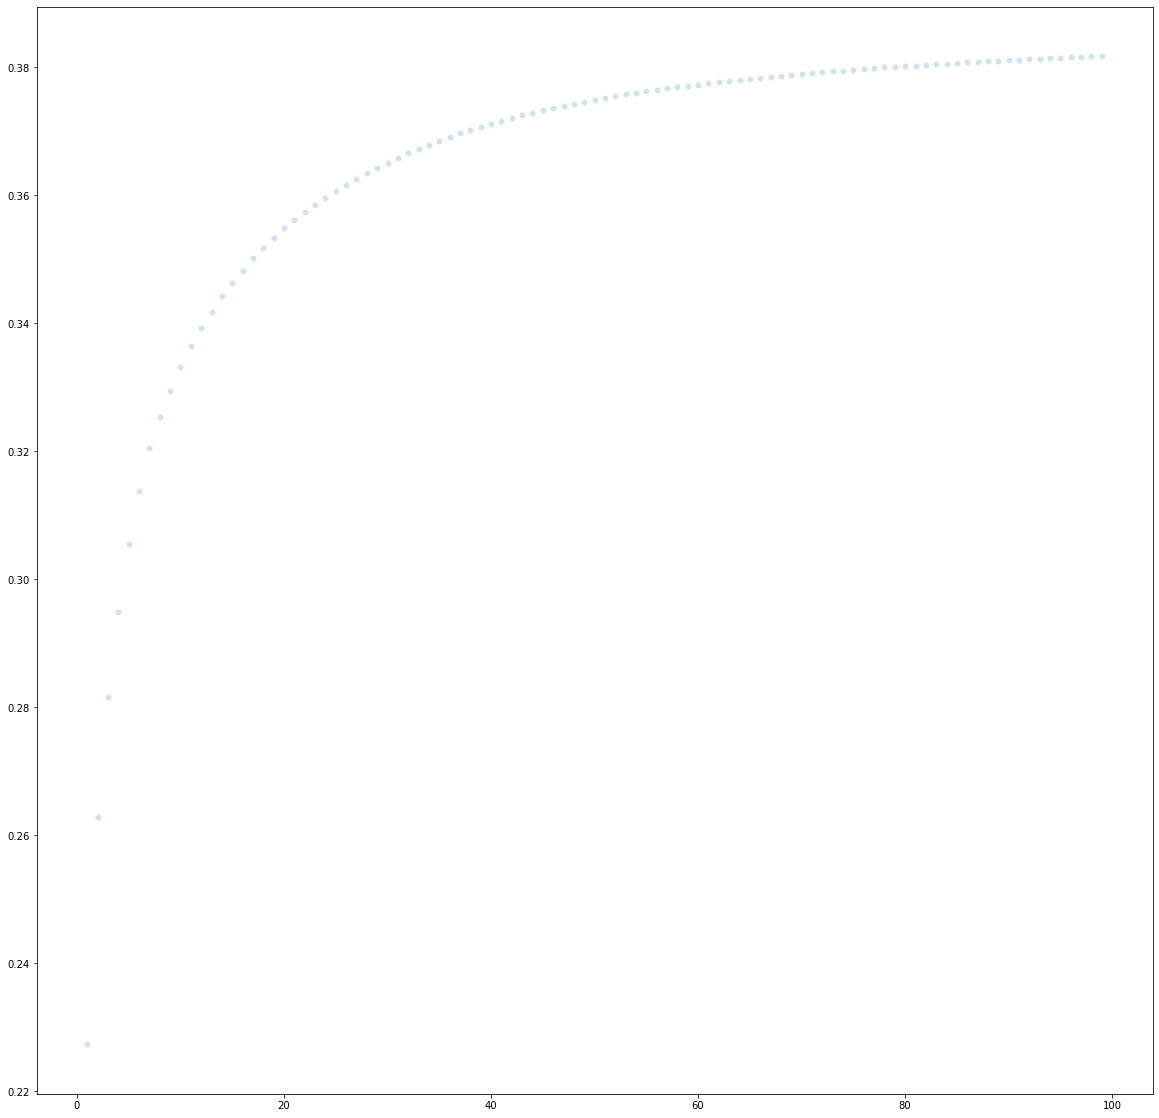

In [63]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores, alpha=0.2)
plt.show()

In [64]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
   

time diff: 7.906452899999749


In [65]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc- mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 9.53600920000008


In [66]:
dic_1 = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(i.iloc[c])
    key = str(v) + "_a"
    dic_1[key] = value
        
    
    
    

In [67]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(i[c])
    key =  str(v) + "_b"
    dic_1[key] = value

In [68]:
df_1 = pd.DataFrame(data = dic_1)
df_1.head()

,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,...,2550_b,2551_b,2552_b,2553_b,2554_b,2555_b,2556_b,2557_b,2558_b,2559_b
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002120,...,0.000623,0.000610,0.000610,0.000626,0.000603,0.000505,0.000611,0.000620,0.000665,0.000644
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002151,...,0.000592,0.000634,0.000634,0.000563,0.000658,0.000611,0.000536,0.000529,0.000558,0.000557
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001390,...,0.000503,0.000500,0.000576,0.000615,0.000722,0.000662,0.000707,0.000703,0.000672,0.000629
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001914,...,0.000543,0.000505,0.000463,0.000435,0.000470,0.000487,0.000500,0.000441,0.000470,0.000482
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001099,...,0.000603,0.000651,0.000622,0.000520,0.000452,0.000436,0.000404,0.000469,0.000440,0.000547


In [69]:
p_scores_1 = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores_1, alpha=0.2)
plt.show()

In [ ]:
p_scores_1 = []
for i in np.arange(1,1000):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,1000), y=p_scores_1, alpha=0.2)
plt.show()